In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv('Largest_Companies.csv')

In [5]:
data.head(5)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [7]:
data['Revenue (USD millions)'] = data['Revenue (USD millions)'].str.replace(',','').astype(int)

In [8]:
data['Revenue growth'] = data['Revenue growth'].str.replace('%','').astype(float)

In [9]:
data['Employees'] = data['Employees'].str.replace(',', '').astype(int)

In [10]:
data.describe()

,Rank,Revenue (USD millions),Revenue growth,Employees
count,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,117566.460000,19.576000,1.680301e+05
std,29.011492,100915.112163,21.463397,2.717493e+05
min,1.000000,44200.000000,0.500000,3.050000e+02
25%,25.750000,57876.000000,4.375000,4.471150e+04
50%,50.500000,80824.500000,11.700000,8.963850e+04
75%,75.250000,138763.000000,23.625000,1.965125e+05
max,100.000000,611289.000000,97.200000,2.100000e+06


In [11]:
top_10_comp = data.head(10)


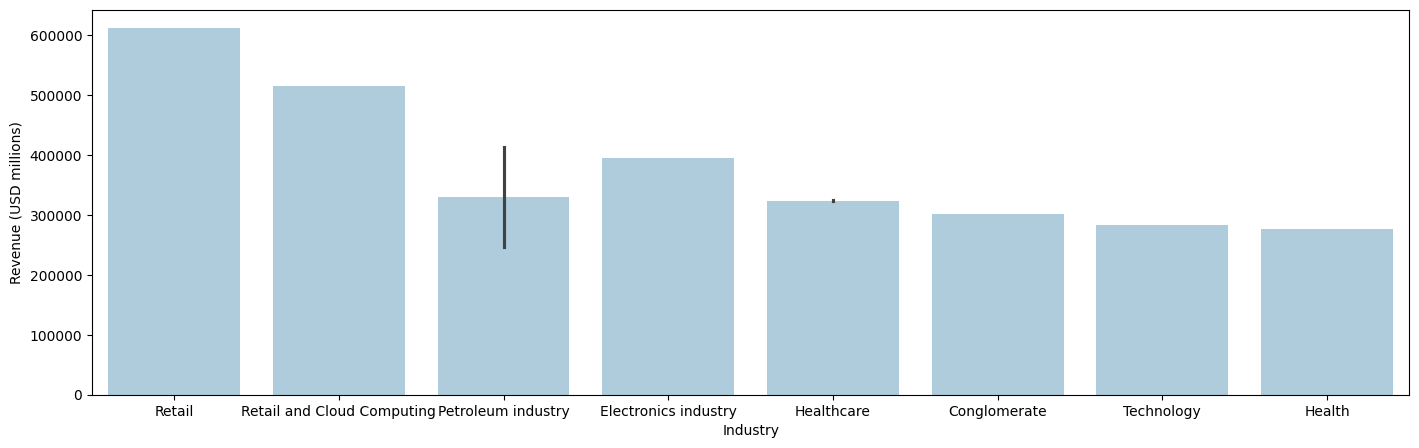

In [12]:
plt.figure(figsize = (17,5))
with sns.color_palette("Paired"):
    sns.barplot(y = 'Revenue (USD millions)', x = 'Industry', data = top_10_comp)

<Axes: xlabel='Revenue growth', ylabel='Revenue (USD millions)'>

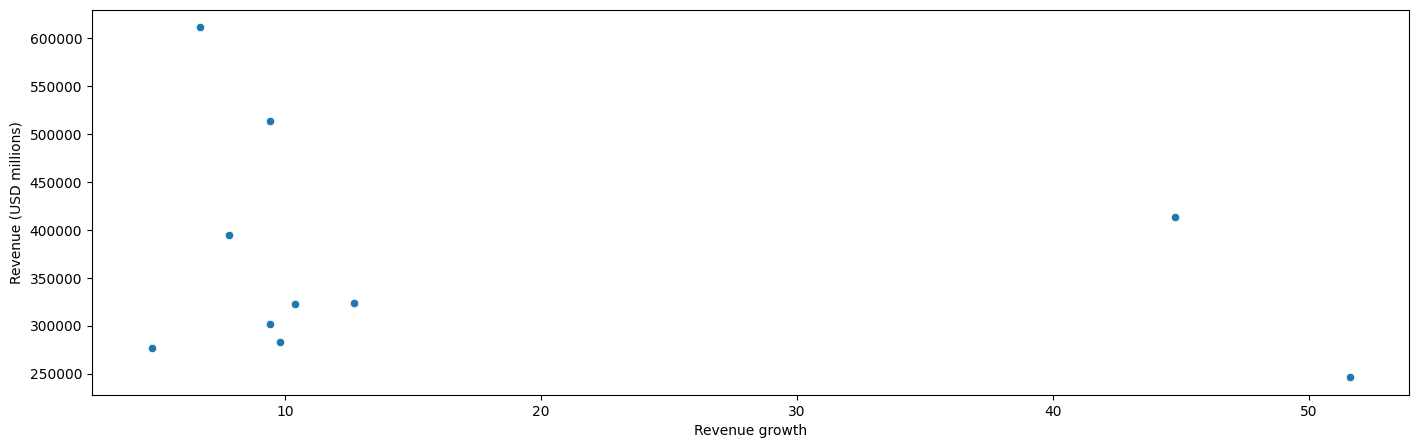

In [13]:
plt.figure(figsize = (17,5))
sns.scatterplot(y = 'Revenue (USD millions)', x ='Revenue growth', data = top_10_comp)

In [14]:
top_5_headquarters = data['Headquarters'].value_counts().head(5)

In [15]:
top_5_headquarters

Headquarters
New York City, New York    12
Houston, Texas              5
Chicago, Illinois           3
Atlanta, Georgia            3
Cincinnati, Ohio            2
Name: count, dtype: int64

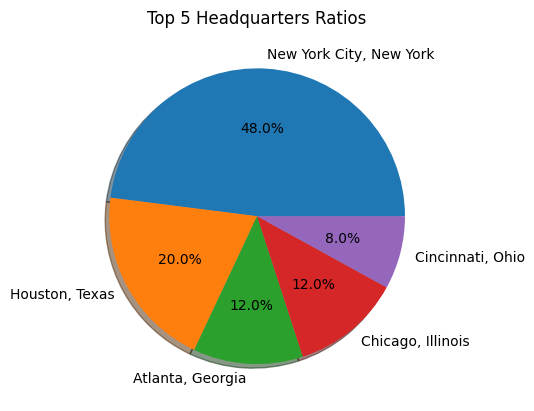

In [16]:
top_5_headquarters = [12, 5, 3, 3, 2]
lst = ['New York City, New York', 'Houston, Texas', 'Atlanta, Georgia', 'Chicago, Illinois', 'Cincinnati, Ohio']

plt.pie(top_5_headquarters, labels=lst, shadow=True, autopct='%1.1f%%')
plt.title('Top 5 Headquarters Ratios')
plt.show()